<a href="https://colab.research.google.com/github/MarioBolanos/Lorenz_System/blob/master/Lorenz_Bifurcations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecuación de Lorenz

## Description 

$$ \frac{dx}{dt}=\sigma(y-x) $$
$$ \frac{dy}{dt}=x(\rho-z)-y $$
$$ \frac{dz}{dt}=xy-\beta x $$

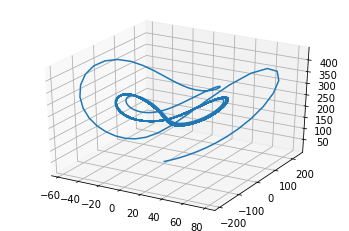

In [73]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

sol=solve_ivp(lorenz,[a,b],y0,args=(10,230,8/3),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
#ax.scatter3D(,"o",color="black")
plt.show()

##Bifurcations 

time= 246.1988879999999


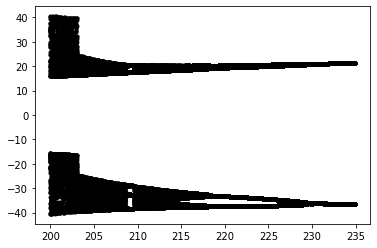

In [84]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

def event_lorenz (t,y,sigma,rho,beta):
  return y[0]+y[1]
# event_lorenz.terminal=True
event_lorenz.direction=0

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(200,235,0.1):
  sol=solve_ivp(lorenz,[a,b],y0,args=(10,r,8/3),t_eval=t,events=event_lorenz,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)
#print(sol.y_events[0])
# ax = plt.axes(projection='3d')
# ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
# ax.scatter3D(k[-3:-1,0],k[-3:-1,1],k[-3:-1,2],"o",color="black")
# plt.show()


# plt.xlabel('$\rho$')
# plt.ylabel('$x(t)$')
# plt.grid();
